In [1]:
import pandas as pd


In [4]:
df= pd.read_csv("data/data.csv")

In [5]:
df= df.sample(n=5000,random_state=42).reset_index(drop=True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978


<h1>Feature and scaling</h1>

In [9]:
from sklearn.preprocessing import StandardScaler

numerical_features=[
    'valence','danceability','energy','tempo','acousticness','instrumentalness','liveness','speechiness'
]

scaler = StandardScaler()
df_scaled= pd.DataFrame(scaler.fit_transform(df[numerical_features]),columns=numerical_features)

df_scaled

,valence,danceability,energy,tempo,acousticness,instrumentalness,liveness,speechiness
0,1.473178,2.032267,0.142150,0.310507,-0.005840,1.916073,-0.783298,-0.107375
1,0.226049,0.276101,-0.771789,-0.886487,1.126217,-0.171477,-0.446557,-0.133457
2,0.470135,1.941333,0.138480,-0.865614,-0.908852,-0.536877,-0.194001,1.737477
3,-1.249911,-0.417272,-0.716732,2.266056,1.144646,2.122604,-0.536354,-0.387900
4,-0.387981,0.634154,-1.404939,-1.477663,1.297342,2.151200,-0.536354,0.010283
...,...,...,...,...,...,...,...,...
4995,0.336651,-0.019435,0.810170,0.374302,-0.837769,-0.536877,-0.598090,-0.353124
4996,1.507503,1.009258,1.357065,-0.824128,-1.106567,-0.536877,0.434583,-0.270821
4997,-0.681647,-1.826752,-0.599278,-2.003804,0.999848,-0.536835,0.114678,-0.387900
4998,-0.906665,-0.815109,-1.495966,-0.516212,1.284178,-0.287769,-0.592478,-0.412243


<h1> Train nd Test </h1>

In [10]:
from sklearn.model_selection import train_test_split

train_data,test_data= train_test_split(df_scaled,test_size=0.2,random_state=42)


<h1>elbow method</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

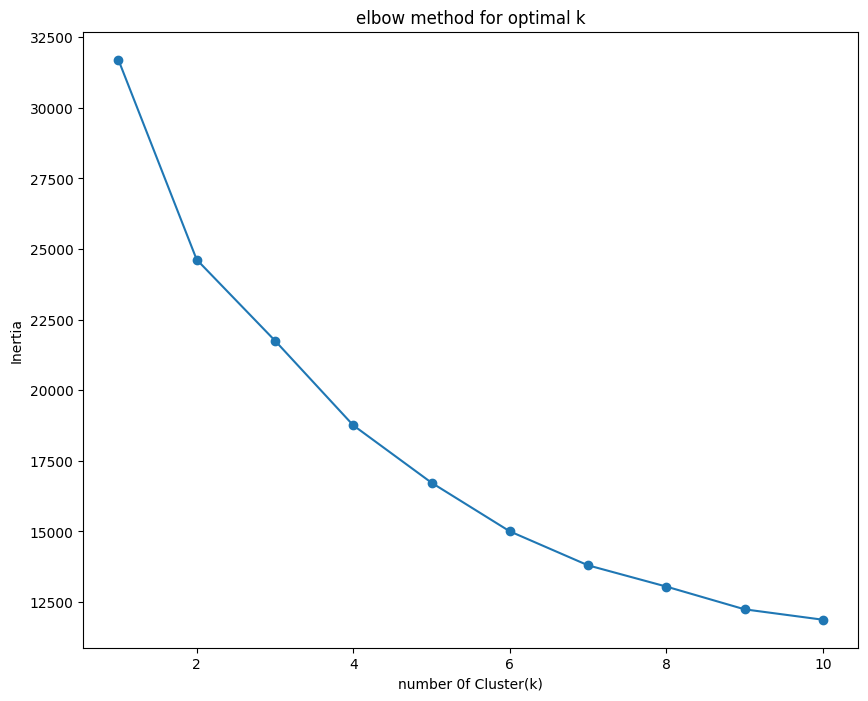

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia=[]

k_values=range(1,11)

for k in k_values:
    kmeans =KMeans(n_clusters=k,random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10,8))
plt.plot(k_values,inertia,marker='o')
plt.xlabel("number 0f Cluster(k)")
plt.ylabel("Inertia")
plt.title("elbow method for optimal k")
plt.show

<h1> appling k means</h1>

In [16]:
optimal_k =5
kmeans =KMeans(n_clusters=optimal_k,random_state=42)
df["Cluster"]=kmeans.fit_predict(df_scaled)

In [17]:
df['Cluster'].value_counts()

Cluster
1    1371
0    1369
4    1104
2     948
3     208
Name: count, dtype: int64

In [18]:
from sklearn.decomposition import PCA

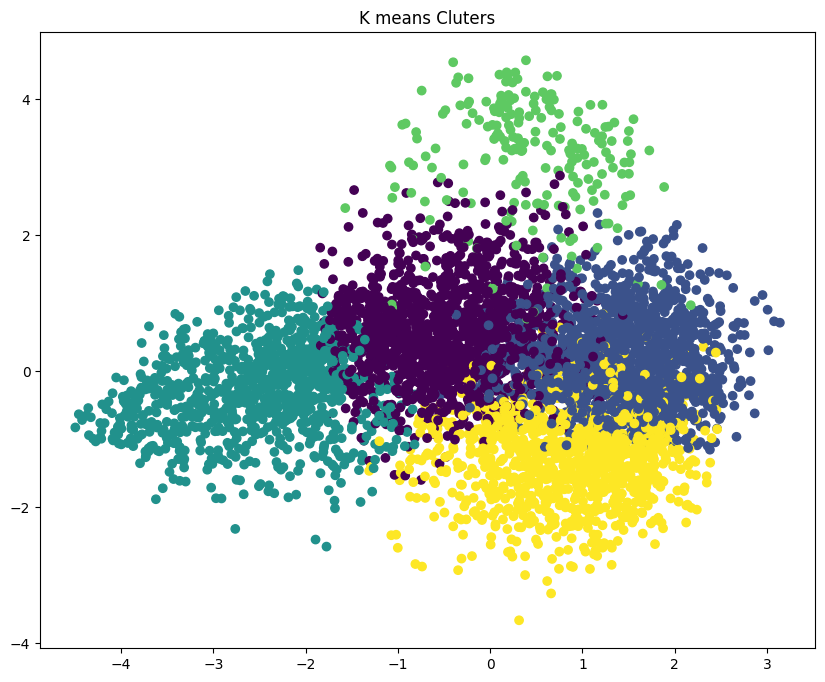

In [24]:
pca= PCA(n_components=2)

pca_result = pca.fit_transform(df_scaled)

pca_result
plt.figure(figsize=(10,8))

plt.scatter(pca_result[:,0],pca_result[:,1],c=df['Cluster'],cmap='viridis')
plt.title("K means Cluters")

plt.show()

<h1>Recoomendation system with Kmeans</h1>

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

def recommend_songs(song_name,df,num_recommendations=5):
    #cluster for input song 
    song_cluster=df[df['name']==song_name]['Cluster'].values[0]
    same_cluster_songs=df[df['Cluster']==song_cluster]
    song_index=same_cluster_songs[same_cluster_songs['name']==song_name].index[0]
    cluster_features =same_cluster_songs[numerical_features]
    similarity = cosine_similarity(cluster_features,cluster_features)
    #top recmoendation
    similar_songs =np.argsort(similarity[song_index]) [-(num_recommendations + 1):-1][::-1]
    recommendations= same_cluster_songs.iloc[similar_songs][['name','year','artists']]
    return recommendations
    


      
        
   


    

In [29]:
#example

input_song = "Soul Junction"
recommend_songs = recommend_songs(input_song,df,num_recommendations=5)

print(f"Songs Similar to '{input_song}':")

recommend_songs

Songs Similar to 'Soul Junction':


,name,year,artists
1088,Legends of the Fall,1995,"['James Horner', 'Vic Frasier']"
3489,"Water Music Suite No. 1 In F, HWV 348: 2. Adag...",1983,"['George Frideric Handel', 'The English Concer..."
2473,"Le sacre du printemps: Part 1 ""Adoration of th...",1948,"['Igor Stravinsky', 'Columbia Symphony Orchest..."
1277,Saving Buckbeak,2004,['John Williams']
3385,"Tristan und Isolde, WWV 90: Prelude",1953,"['Richard Wagner', 'Arturo Toscanini']"


In [30]:
df.to_csv("clustered_df.csv")